In [3]:
import numpy

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, num_mutations=1):
    mutations_counter = numpy.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # The random value to be added to the gene.
            random_value = numpy.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    return offspring_crossover

[[-0.25456941 -2.8104977  -3.08327897 -2.73916893 -1.43601938  1.63011533]
 [-2.92747691 -0.25547285  3.26781406  3.70670226 -3.9917707   2.34109036]
 [ 0.77269143 -0.08359682  3.96526251 -2.21858778  2.64964675  2.64480969]
 [-1.84437593  1.56735404  1.95991391  0.13331184  2.73856591 -0.07476927]
 [ 1.1560356   3.35461344 -2.08278707  3.53180689 -2.86040513  3.26255023]
 [ 0.6278257   3.66088948 -2.92402958 -2.01019913 -1.54453191 -2.76161419]
 [ 1.16442922  2.04573251 -0.65196575  0.21394021 -3.99657481  3.90457436]
 [ 3.83420527 -2.55100004 -1.14907861 -0.89954529  2.63364648  1.35856832]]
Generation :  0
Fitness
[-11.74993224  51.67825166 -35.5332806  -32.7587633   24.41466558
   4.87386239  24.96489622 -23.43606282]
Best result :  51.67825165960818
Parents
[[-2.92747691 -0.25547285  3.26781406  3.70670226 -3.9917707   2.34109036]
 [ 1.16442922  2.04573251 -0.65196575  0.21394021 -3.99657481  3.90457436]
 [ 1.1560356   3.35461344 -2.08278707  3.53180689 -2.86040513  3.26255023]
 [

Mutation
[[ -2.92747691  -0.25547285  22.14971743   3.70670226  -3.9917707
  -15.53062428]
 [ -2.92747691  -0.25547285  20.73549246   3.70670226  -3.9917707
  -15.40886158]
 [ -2.92747691  -0.25547285  21.63408059   3.70670226  -3.9917707
  -13.09509949]
 [ -2.92747691  -0.25547285  21.73762705   3.70670226  -3.9917707
  -15.50606732]]
Generation :  55
Fitness
[198.56454541 193.23683653 193.18819565 191.65049572 201.76197221
 196.23990018 188.5102768  200.20423821]
Best result :  201.7619722132613
Parents
[[ -2.92747691  -0.25547285  22.14971743   3.70670226  -3.9917707
  -15.53062428]
 [ -2.92747691  -0.25547285  21.73762705   3.70670226  -3.9917707
  -15.50606732]
 [ -2.92747691  -0.25547285  21.20357532   3.70670226  -3.9917707
  -15.55489461]
 [ -2.92747691  -0.25547285  20.73549246   3.70670226  -3.9917707
  -15.40886158]]
Crossover
[[ -2.92747691  -0.25547285  22.14971743   3.70670226  -3.9917707
  -15.50606732]
 [ -2.92747691  -0.25547285  21.73762705   3.70670226  -3.9917707
  

Mutation
[[ -2.92747691  -0.25547285  46.78833004   3.70670226  -3.9917707
  -37.98797115]
 [ -2.92747691  -0.25547285  44.68185665   3.70670226  -3.9917707
  -37.39662154]
 [ -2.92747691  -0.25547285  46.88525149   3.70670226  -3.9917707
  -39.82010578]
 [ -2.92747691  -0.25547285  45.43798765   3.70670226  -3.9917707
  -39.59315865]]
Generation :  124
Fitness
[401.25535976 394.05987333 393.46237216 392.48786798 393.54664665
 383.39464663 402.49690451 396.36482954]
Best result :  402.4969045135696
Parents
[[ -2.92747691  -0.25547285  46.88525149   3.70670226  -3.9917707
  -39.82010578]
 [ -2.92747691  -0.25547285  46.24288443   3.70670226  -3.9917707
  -40.03430577]
 [ -2.92747691  -0.25547285  45.43798765   3.70670226  -3.9917707
  -39.59315865]
 [ -2.92747691  -0.25547285  45.62442381   3.70670226  -3.9917707
  -38.96390699]]
Crossover
[[ -2.92747691  -0.25547285  46.88525149   3.70670226  -3.9917707
  -40.03430577]
 [ -2.92747691  -0.25547285  46.24288443   3.70670226  -3.9917707
 

Crossover
[[ -2.92747691  -0.25547285  65.69856268   3.70670226  -3.9917707
  -60.47848949]
 [ -2.92747691  -0.25547285  66.66931044   3.70670226  -3.9917707
  -60.01424769]
 [ -2.92747691  -0.25547285  66.28212387   3.70670226  -3.9917707
  -61.5022256 ]
 [ -2.92747691  -0.25547285  64.2343879    3.70670226  -3.9917707
  -61.61424217]]
Mutation
[[ -2.92747691  -0.25547285  65.65587024   3.70670226  -3.9917707
  -59.59845671]
 [ -2.92747691  -0.25547285  67.28236335   3.70670226  -3.9917707
  -60.04422446]
 [ -2.92747691  -0.25547285  65.33586432   3.70670226  -3.9917707
  -61.97237043]
 [ -2.92747691  -0.25547285  63.55618071   3.70670226  -3.9917707
  -61.67182375]]
Generation :  193
Fitness
[570.77593473 568.83551431 565.29842485 565.12484513 561.15231949
 568.94015384 571.18969326 563.54823125]
Best result :  571.1896932643715
Parents
[[ -2.92747691  -0.25547285  65.33586432   3.70670226  -3.9917707
  -61.97237043]
 [ -2.92747691  -0.25547285  65.69856268   3.70670226  -3.9917707
 

Crossover
[[ -2.92747691  -0.25547285  91.36402893   3.70670226  -3.9917707
  -86.35366049]
 [ -2.92747691  -0.25547285  90.1712026    3.70670226  -3.9917707
  -86.23646451]
 [ -2.92747691  -0.25547285  89.64258111   3.70670226  -3.9917707
  -84.81963234]
 [ -2.92747691  -0.25547285  90.42976061   3.70670226  -3.9917707
  -85.50764039]]
Mutation
[[ -2.92747691  -0.25547285  91.03039266   3.70670226  -3.9917707
  -86.63751892]
 [ -2.92747691  -0.25547285  90.6741965    3.70670226  -3.9917707
  -86.22960523]
 [ -2.92747691  -0.25547285  89.94325766   3.70670226  -3.9917707
  -85.67225105]
 [ -2.92747691  -0.25547285  90.89607859   3.70670226  -3.9917707
  -85.52907212]]
Generation :  274
Fitness
[772.90403824 772.70544054 770.30444423 766.40046126 777.04674036
 773.88285948 768.70500888 771.36694118]
Best result :  777.0467403628038
Parents
[[ -2.92747691  -0.25547285  91.03039266   3.70670226  -3.9917707
  -86.63751892]
 [ -2.92747691  -0.25547285  90.6741965    3.70670226  -3.9917707
 

Crossover
[[  -2.92747691   -0.25547285  109.56324501    3.70670226   -3.9917707
  -108.94325707]
 [  -2.92747691   -0.25547285  110.58810837    3.70670226   -3.9917707
  -109.32645625]
 [  -2.92747691   -0.25547285  109.49933798    3.70670226   -3.9917707
  -108.83036211]
 [  -2.92747691   -0.25547285  109.99626311    3.70670226   -3.9917707
  -109.75525212]]
Mutation
[[  -2.92747691   -0.25547285  110.51270689    3.70670226   -3.9917707
  -108.32343867]
 [  -2.92747691   -0.25547285  111.0154143     3.70670226   -3.9917707
  -109.90590006]
 [  -2.92747691   -0.25547285  108.6335671     3.70670226   -3.9917707
  -109.33477913]
 [  -2.92747691   -0.25547285  110.12710743    3.70670226   -3.9917707
  -109.74400506]]
Generation :  350
Fitness
[950.56506961 950.33571468 948.3260544  947.73364992 947.158663
 956.35570747 945.3349739  952.48572691]
Best result :  956.3557074656816
Parents
[[  -2.92747691   -0.25547285  111.0154143     3.70670226   -3.9917707
  -109.90590006]
 [  -2.92747691

Crossover
[[  -2.92747691   -0.25547285  128.11685298    3.70670226   -3.9917707
  -133.07344214]
 [  -2.92747691   -0.25547285  127.9175624     3.70670226   -3.9917707
  -133.33273605]
 [  -2.92747691   -0.25547285  127.20609009    3.70670226   -3.9917707
  -133.36568255]
 [  -2.92747691   -0.25547285  127.12600525    3.70670226   -3.9917707
  -133.06987674]]
Mutation
[[  -2.92747691   -0.25547285  127.85387349    3.70670226   -3.9917707
  -132.50064265]
 [  -2.92747691   -0.25547285  128.53239178    3.70670226   -3.9917707
  -133.30071421]
 [  -2.92747691   -0.25547285  128.20104578    3.70670226   -3.9917707
  -133.62347841]
 [  -2.92747691   -0.25547285  126.43567467    3.70670226   -3.9917707
  -132.71972928]]
Generation :  413
Fitness
[1125.08143325 1124.40067361 1123.1292019  1123.0037535  1121.48560479
 1127.62075514 1127.97803589 1117.55161608]
Best result :  1127.9780358867679
Parents
[[  -2.92747691   -0.25547285  128.20104578    3.70670226   -3.9917707
  -133.62347841]
 [  

Crossover
[[  -2.92747691   -0.25547285  147.98258804    3.70670226   -3.9917707
  -158.11759319]
 [  -2.92747691   -0.25547285  148.67555383    3.70670226   -3.9917707
  -158.18608068]
 [  -2.92747691   -0.25547285  148.43071269    3.70670226   -3.9917707
  -159.04644454]
 [  -2.92747691   -0.25547285  146.95946072    3.70670226   -3.9917707
  -158.78478436]]
Mutation
[[  -2.92747691   -0.25547285  148.96971603    3.70670226   -3.9917707
  -158.51907681]
 [  -2.92747691   -0.25547285  149.09237632    3.70670226   -3.9917707
  -158.73968649]
 [  -2.92747691   -0.25547285  147.69249681    3.70670226   -3.9917707
  -158.63111278]
 [  -2.92747691   -0.25547285  147.82884118    3.70670226   -3.9917707
  -157.79444009]]
Generation :  485
Fitness
[1315.47157177 1314.76115355 1314.22610073 1313.120429   1317.67769423
 1319.14387076 1313.73399603 1310.27883968]
Best result :  1319.1438707602
Parents
[[  -2.92747691   -0.25547285  149.09237632    3.70670226   -3.9917707
  -158.73968649]
 [  -2.

Mutation
[[  -2.92747691   -0.25547285  171.59651285    3.70670226   -3.9917707
  -186.3243253 ]
 [  -2.92747691   -0.25547285  171.08181789    3.70670226   -3.9917707
  -185.46254847]
 [  -2.92747691   -0.25547285  170.66207263    3.70670226   -3.9917707
  -185.23735663]
 [  -2.92747691   -0.25547285  171.42453063    3.70670226   -3.9917707
  -185.93124658]]
Generation :  567
Fitness
[1525.73304656 1524.30110941 1523.35112419 1523.16938738 1527.55615101
 1521.70436756 1519.1768575  1525.10674327]
Best result :  1527.556151013718
Parents
[[  -2.92747691   -0.25547285  171.59651285    3.70670226   -3.9917707
  -186.3243253 ]
 [  -2.92747691   -0.25547285  171.65441368    3.70670226   -3.9917707
  -185.8933131 ]
 [  -2.92747691   -0.25547285  171.42453063    3.70670226   -3.9917707
  -185.93124658]
 [  -2.92747691   -0.25547285  171.34196694    3.70670226   -3.9917707
  -185.82131872]]
Crossover
[[  -2.92747691   -0.25547285  171.59651285    3.70670226   -3.9917707
  -185.8933131 ]
 [  -

Mutation
[[  -2.92747691   -0.25547285  187.08236007    3.70670226   -3.9917707
  -212.52242432]
 [  -2.92747691   -0.25547285  188.57131566    3.70670226   -3.9917707
  -209.85154273]
 [  -2.92747691   -0.25547285  189.7550146     3.70670226   -3.9917707
  -211.85106579]
 [  -2.92747691   -0.25547285  187.78045853    3.70670226   -3.9917707
  -213.27914254]]
Generation :  635
Fitness
[1706.50488335 1704.60486742 1702.75510362 1702.28153124 1704.88768171
 1697.54588277 1711.08658742 1710.88760192]
Best result :  1711.0865874165706
Parents
[[  -2.92747691   -0.25547285  189.7550146     3.70670226   -3.9917707
  -211.85106579]
 [  -2.92747691   -0.25547285  187.78045853    3.70670226   -3.9917707
  -213.27914254]
 [  -2.92747691   -0.25547285  187.83747181    3.70670226   -3.9917707
  -212.30419253]
 [  -2.92747691   -0.25547285  187.08236007    3.70670226   -3.9917707
  -212.52242432]]
Crossover
[[  -2.92747691   -0.25547285  189.7550146     3.70670226   -3.9917707
  -213.27914254]
 [  

Mutation
[[  -2.92747691   -0.25547285  207.26873697    3.70670226   -3.9917707
  -235.41749249]
 [  -2.92747691   -0.25547285  207.74148692    3.70670226   -3.9917707
  -235.61939659]
 [  -2.92747691   -0.25547285  206.65868878    3.70670226   -3.9917707
  -236.89256368]
 [  -2.92747691   -0.25547285  206.57306399    3.70670226   -3.9917707
  -236.63511328]]
Generation :  704
Fitness
[1887.00118621 1884.90299905 1883.70379885 1882.81553707 1883.14682125
 1885.75039532 1887.94448713 1886.43478351]
Best result :  1887.9444871282044
Parents
[[  -2.92747691   -0.25547285  206.65868878    3.70670226   -3.9917707
  -236.89256368]
 [  -2.92747691   -0.25547285  207.55382962    3.70670226   -3.9917707
  -236.02526711]
 [  -2.92747691   -0.25547285  206.57306399    3.70670226   -3.9917707
  -236.63511328]
 [  -2.92747691   -0.25547285  207.74148692    3.70670226   -3.9917707
  -235.61939659]]
Crossover
[[  -2.92747691   -0.25547285  206.65868878    3.70670226   -3.9917707
  -236.02526711]
 [  

Crossover
[[-2.92747691e+00 -2.55472851e-01  2.27440215e+02  3.70670226e+00
  -3.99177070e+00 -2.59483021e+02]
 [-2.92747691e+00 -2.55472851e-01  2.26677781e+02  3.70670226e+00
  -3.99177070e+00 -2.58619902e+02]
 [-2.92747691e+00 -2.55472851e-01  2.27113672e+02  3.70670226e+00
  -3.99177070e+00 -2.59440774e+02]
 [-2.92747691e+00 -2.55472851e-01  2.25478288e+02  3.70670226e+00
  -3.99177070e+00 -2.59702650e+02]]
Mutation
[[-2.92747691e+00 -2.55472851e-01  2.27714058e+02  3.70670226e+00
  -3.99177070e+00 -2.59817635e+02]
 [-2.92747691e+00 -2.55472851e-01  2.27070383e+02  3.70670226e+00
  -3.99177070e+00 -2.57959485e+02]
 [-2.92747691e+00 -2.55472851e-01  2.27567418e+02  3.70670226e+00
  -3.99177070e+00 -2.60152660e+02]
 [-2.92747691e+00 -2.55472851e-01  2.24866798e+02  3.70670226e+00
  -3.99177070e+00 -2.59752717e+02]]
Generation :  768
Fitness
[2067.88723429 2064.18645785 2061.65541949 2059.78967326 2069.38611108
 2058.3999449  2070.44749281 2059.11558719]
Best result :  2070.4474928130

Parents
[[-2.92747691e+00 -2.55472851e-01  2.49626513e+02  3.70670226e+00
  -3.99177070e+00 -2.80565945e+02]
 [-2.92747691e+00 -2.55472851e-01  2.48934627e+02  3.70670226e+00
  -3.99177070e+00 -2.80686928e+02]
 [-2.92747691e+00 -2.55472851e-01  2.48184963e+02  3.70670226e+00
  -3.99177070e+00 -2.81070375e+02]
 [-2.92747691e+00 -2.55472851e-01  2.49385457e+02  3.70670226e+00
  -3.99177070e+00 -2.80104033e+02]]
Crossover
[[-2.92747691e+00 -2.55472851e-01  2.49626513e+02  3.70670226e+00
  -3.99177070e+00 -2.80686928e+02]
 [-2.92747691e+00 -2.55472851e-01  2.48934627e+02  3.70670226e+00
  -3.99177070e+00 -2.81070375e+02]
 [-2.92747691e+00 -2.55472851e-01  2.48184963e+02  3.70670226e+00
  -3.99177070e+00 -2.80104033e+02]
 [-2.92747691e+00 -2.55472851e-01  2.49385457e+02  3.70670226e+00
  -3.99177070e+00 -2.80565945e+02]]
Mutation
[[-2.92747691e+00 -2.55472851e-01  2.49516313e+02  3.70670226e+00
  -3.99177070e+00 -2.80261860e+02]
 [-2.92747691e+00 -2.55472851e-01  2.48981989e+02  3.70670226e

Crossover
[[-2.92747691e+00 -2.55472851e-01  2.81295530e+02  3.70670226e+00
  -3.99177070e+00 -3.13440156e+02]
 [-2.92747691e+00 -2.55472851e-01  2.81394521e+02  3.70670226e+00
  -3.99177070e+00 -3.13027499e+02]
 [-2.92747691e+00 -2.55472851e-01  2.81478170e+02  3.70670226e+00
  -3.99177070e+00 -3.12771540e+02]
 [-2.92747691e+00 -2.55472851e-01  2.80892810e+02  3.70670226e+00
  -3.99177070e+00 -3.14121758e+02]]
Mutation
[[-2.92747691e+00 -2.55472851e-01  2.81648042e+02  3.70670226e+00
  -3.99177070e+00 -3.12844933e+02]
 [-2.92747691e+00 -2.55472851e-01  2.82279211e+02  3.70670226e+00
  -3.99177070e+00 -3.13746620e+02]
 [-2.92747691e+00 -2.55472851e-01  2.81259861e+02  3.70670226e+00
  -3.99177070e+00 -3.11868490e+02]
 [-2.92747691e+00 -2.55472851e-01  2.80788831e+02  3.70670226e+00
  -3.99177070e+00 -3.13473126e+02]]
Generation :  937
Fitness
[2512.15064547 2509.29358659 2507.64687045 2504.39510081 2507.38335795
 2513.83038259 2501.43544558 2507.32862723]
Best result :  2513.8303825874

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


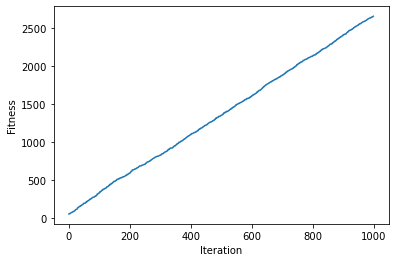

In [4]:
import numpy

"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

"""
new_population[0, :] = [2.4,  0.7, 8, -2,   5,   1.1]
new_population[1, :] = [-0.4, 2.7, 5, -1,   7,   0.1]
new_population[2, :] = [-1,   2,   2, -3,   2,   0.9]
new_population[3, :] = [4,    7,   12, 6.1, 1.4, -4]
new_population[4, :] = [3.1,  4,   0,  2.4, 4.8,  0]
new_population[5, :] = [-2,   3,   -7, 6,   3,    3]
"""

best_outputs = []
num_generations = 1000
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measuring the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)
    print("Fitness")
    print(fitness)

    best_outputs.append(numpy.max(fitness))
    # The best result in the current iteration.
    print("Best result : ", numpy.max(fitness))
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)
    print("Parents")
    print(parents)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    print("Crossover")
    print(offspring_crossover)

    # Adding some variations to the offspring using mutation.
    offspring_mutation = mutation(offspring_crossover, num_mutations=2)
    print("Mutation")
    print(offspring_mutation)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()

In [5]:
print("NEW_POP : ", new_population)

NEW_POP :  [[-2.92747691e+00 -2.55472851e-01  2.98523465e+02  3.70670226e+00
  -3.99177070e+00 -3.32942824e+02]
 [-2.92747691e+00 -2.55472851e-01  2.97601989e+02  3.70670226e+00
  -3.99177070e+00 -3.32768529e+02]
 [-2.92747691e+00 -2.55472851e-01  2.98121429e+02  3.70670226e+00
  -3.99177070e+00 -3.32309103e+02]
 [-2.92747691e+00 -2.55472851e-01  2.97244306e+02  3.70670226e+00
  -3.99177070e+00 -3.32940720e+02]
 [-2.92747691e+00 -2.55472851e-01  2.98587396e+02  3.70670226e+00
  -3.99177070e+00 -3.32371059e+02]
 [-2.92747691e+00 -2.55472851e-01  2.97390100e+02  3.70670226e+00
  -3.99177070e+00 -3.32391927e+02]
 [-2.92747691e+00 -2.55472851e-01  2.98681627e+02  3.70670226e+00
  -3.99177070e+00 -3.33700584e+02]
 [-2.92747691e+00 -2.55472851e-01  2.97066797e+02  3.70670226e+00
  -3.99177070e+00 -3.33649246e+02]]


In [9]:
# Creating the new population based on the parents and offspring.
new_population[0:parents.shape[0], :] = parents
print("1",new_population[0:parents.shape[0], :])
new_population[parents.shape[0]:, :] = offspring_mutation
print("2",new_population[parents.shape[0]:, :])
    
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

# print("Best solution : ", new_population[best_match_idx, :])
# print("Best solution fitness : ", fitness[best_match_idx])

1 [[-2.92747691e+00 -2.55472851e-01  2.98523465e+02  3.70670226e+00
  -3.99177070e+00 -3.32942824e+02]
 [-2.92747691e+00 -2.55472851e-01  2.97601989e+02  3.70670226e+00
  -3.99177070e+00 -3.32768529e+02]
 [-2.92747691e+00 -2.55472851e-01  2.98121429e+02  3.70670226e+00
  -3.99177070e+00 -3.32309103e+02]
 [-2.92747691e+00 -2.55472851e-01  2.97244306e+02  3.70670226e+00
  -3.99177070e+00 -3.32940720e+02]]
2 [[-2.92747691e+00 -2.55472851e-01  2.98587396e+02  3.70670226e+00
  -3.99177070e+00 -3.32371059e+02]
 [-2.92747691e+00 -2.55472851e-01  2.97390100e+02  3.70670226e+00
  -3.99177070e+00 -3.32391927e+02]
 [-2.92747691e+00 -2.55472851e-01  2.98681627e+02  3.70670226e+00
  -3.99177070e+00 -3.33700584e+02]
 [-2.92747691e+00 -2.55472851e-01  2.97066797e+02  3.70670226e+00
  -3.99177070e+00 -3.33649246e+02]]


In [10]:
fitness

array([2660.9074299 , 2656.86307623, 2656.52181248, 2656.42048117,
       2658.44389209, 2654.35143299, 2665.02246598, 2659.1292737 ])

In [11]:
best_match_idx

(array([6], dtype=int64),)